In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical

In [ ]:
data = pd.read_csv('Tweets.csv')

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweet = data[['airline_sentiment' , 'text']]

In [ ]:
tweet.shape

(14640, 2)

In [ ]:
tweet.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


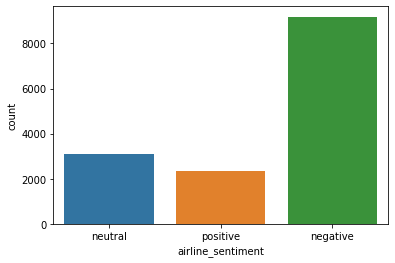

In [ ]:
sns.countplot(x = 'airline_sentiment' , data = tweet)
plt.show()

In [ ]:
#dropping neutral class. We are currently concerned with positive and negative samples.
tweet.drop(tweet[tweet['airline_sentiment'] == 'neutral'].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


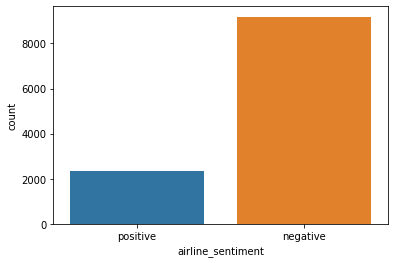

In [ ]:
sns.countplot(x = 'airline_sentiment' , data = tweet)
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

In [ ]:
tweet.shape

(11541, 2)

In [ ]:
label = pd.get_dummies(tweet["airline_sentiment"])
final_labels = label['positive'] #1 for positive and 0 for negative.

In [ ]:
label.shape

(11541, 2)

In [ ]:
label

,negative,positive
1,0,1
3,1,0
4,1,0
5,1,0
6,0,1
...,...,...
14633,1,0
14634,1,0
14635,0,1
14636,1,0


In [ ]:
final_labels

1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: positive, Length: 11541, dtype: uint8

In [ ]:
## DATA Cleaning

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def text_cleaning(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)
    remv_punc_clean = [word for word in remv_punc_join.split() if word.lower() not in stopwords.words('english')]
    return np.array(remv_punc_clean)

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Lets visualize the newly created function
tweet['clean'] = tweet['text'].apply(text_cleaning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tweet['clean'].shape

(11541,)

In [ ]:
tweet.head()

,airline_sentiment,text,clean
1,positive,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, youve, added, commercial..."
3,negative,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn..."
4,negative,@VirginAmerica and it's a really big bad thing...,"[virginamerica, really, big, bad, thing]"
5,negative,@VirginAmerica seriously would pay $30 a fligh...,"[virginamerica, seriously, would, pay, 30, fli..."
6,positive,"@VirginAmerica yes, nearly every time I fly VX...","[virginamerica, yes, nearly, every, time, fly,..."


In [ ]:
#Feature extraction, text_cleaning analyzer implements the buildin cleaning process
X_tweets = CountVectorizer(analyzer= text_cleaning, max_features=2000, dtype= 'uint8').fit_transform(tweet['text']).toarray()

In [ ]:
X_tweets.shape

(11541, 2000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tweets, final_labels, test_size = 0.2, random_state = 1, stratify =final_labels)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Predicting test cases
y_pred_test = NaiveBclassifier.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracyNaaive = accuracy_score(list(y_pred_test), y_test)

print ("The model accuracy is :", accuracyNaaive)

The model accuracy is : 0.9047206582936336


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,  Flatten, Dropout
import keras.backend as K

In [ ]:
X_train.shape

(9232, 2000)

In [ ]:
y_train.shape

(9232,)


hh = model.fit(x = X_train, y = y_train, validation_data=0.1, epochs=1, verbose=1, batch_size = 128)

In [ ]:
from sklearn.neural_network import MLPClassifier
NNclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(12, 1), random_state=1) #12 units of neurons of HL
NNclf.fit(X_train, y_train)
ypredNN = NNclf.predict(X_test)
metrics.accuracy_score(y_test, ypredNN)

0.7951494153313122

In [ ]:
ypredNNtrain = NNclf.predict(X_train) 

accuracynntrain = accuracy_score(list(y_pred_test), y_test)

print ("The model accuracy on training data is :", accuracynntrain)  #

The model accuracy on training data is : 0.9047206582936336


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Recall, Precision and F1 score for ANN****

In [ ]:
f1_score(y_test, ypredNN, average='weighted')

0.7044122202886799

In [ ]:
precision_score(y_test, ypredNN, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6322625927017277

In [ ]:
recall_score(y_test, ypredNN, average='weighted')

0.7951494153313122

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


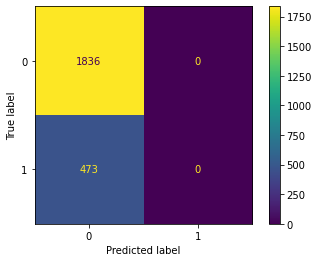

In [ ]:
# Confusion matrix
plot_confusion_matrix(NNclf, X_test, y_test) 
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


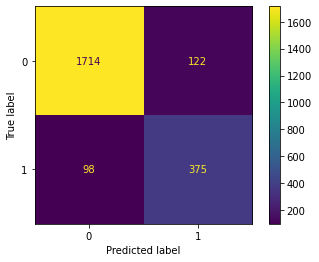

In [ ]:
plot_confusion_matrix(NaiveBclassifier, X_test, y_test)  
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

## Recall, Precision and F1 score for NaiveB

In [ ]:
f1_score(y_test, y_pred_test, average='weighted')

0.9055859529120872

In [ ]:
precision_score(y_test, y_pred_test, average='weighted')

0.9067099761123854

In [ ]:
recall_score(y_test, y_pred_test, average='weighted')

0.9047206582936336

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC #classification 

In [ ]:

svmmodel = SVC()
svmmodel.fit(X_train, y_train)

SVC()

In [ ]:
# print prediction results
svm_predictions = svmmodel.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1836
           1       0.87      0.60      0.71       473

    accuracy                           0.90      2309
   macro avg       0.89      0.79      0.83      2309
weighted avg       0.90      0.90      0.89      2309



## Recall, Precision and F1 score for SVM

In [ ]:
metrics.accuracy_score(y_test, svm_predictions)

0.9012559549588567

In [ ]:
f1_score(y_test, svm_predictions, average='weighted')

0.8941335428519963

In [ ]:
precision_score(y_test, svm_predictions, average='weighted')

0.8992937047966233

In [ ]:
recall_score(y_test, svm_predictions, average='weighted')

0.9012559549588567

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


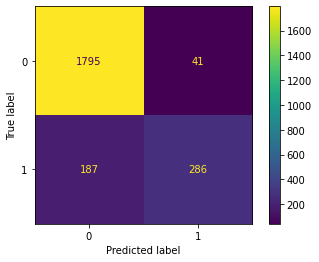

In [ ]:
plot_confusion_matrix(svmmodel, X_test, y_test)  
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

# To run this, change to cell code
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
#print(grid.best_params_) #10, 0.01

In [ ]:
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

In [ ]:
optmodel = SVC(C=10, gamma=0.01) #as GRIDsearchCV consumes time, so we comment it. (10, 0.01) are best values.

In [ ]:
optmodel.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
# print prediction results
svm_predictions = optmodel.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1836
           1       0.83      0.71      0.76       473

    accuracy                           0.91      2309
   macro avg       0.88      0.84      0.85      2309
weighted avg       0.91      0.91      0.91      2309



In [ ]:
metrics.accuracy_score(y_test, svm_predictions)

0.9103508012126462

In [ ]:
f1_score(y_test, svm_predictions, average='weighted')

0.9077373589345412

In [ ]:
recall_score(y_test, svm_predictions, average='weighted')

0.9103508012126462

In [ ]:
precision_score(y_test, svm_predictions, average='weighted')

0.9074368612130781

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


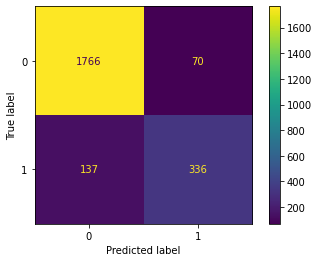

In [ ]:
plot_confusion_matrix(optmodel, X_test, y_test)  
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), use_idf = True, max_features = 2000)
X = vectorizer.fit_transform(tweet['text']).toarray()

In [ ]:
X.shape

(11541, 2000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, final_labels, test_size = 0.2, random_state = 1, stratify =final_labels)

## Accuracy, Recall, Precision, F1-score for TF-IDF-NB

In [ ]:
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

# Predicting test cases
y_pred_test = NaiveBclassifier.predict(X_test)


accuracyNaaive = accuracy_score(list(y_pred_test), y_test)

print ("The model accuracy is :", accuracyNaaive)

The model accuracy is : 0.89172802078822


In [ ]:
f1_score(y_test, y_pred_test, average='weighted')

0.8770027381742703

In [ ]:
precision_score(y_test, y_pred_test, average='weighted')

0.9006960337993005

In [ ]:
recall_score(y_test, y_pred_test, average='weighted')

0.89172802078822

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


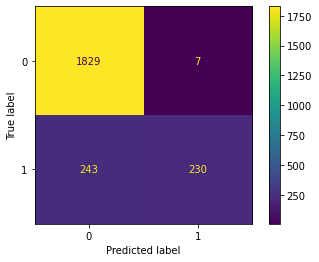

In [ ]:
plot_confusion_matrix(NaiveBclassifier, X_test, y_test)  
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

## ANN-TF-IDF

In [ ]:
NNclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(12, 1), random_state=1)
NNclf.fit(X_train, y_train)
ypredNN = NNclf.predict(X_test)
metrics.accuracy_score(y_test, ypredNN)

0.7951494153313122

In [ ]:
recall_score(y_test, ypredNN, average='weighted')

0.7951494153313122

In [ ]:
precision_score(y_test, ypredNN, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6322625927017277

In [ ]:
f1_score(y_test, ypredNN, average='weighted')

0.7044122202886799

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


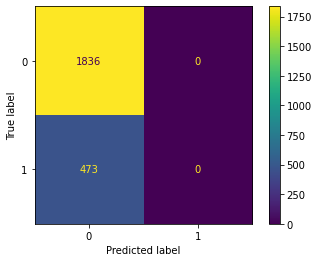

In [ ]:
plot_confusion_matrix(NNclf, X_test, y_test)  
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
optmodel = SVC(C=10, gamma=1, kernel = 'rbf') #(10,1) are best values obtained from above step. 
optmodel.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [ ]:
# print prediction results
svm_predictions = optmodel.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1836
           1       0.89      0.71      0.79       473

    accuracy                           0.92      2309
   macro avg       0.91      0.85      0.87      2309
weighted avg       0.92      0.92      0.92      2309



In [ ]:
metrics.accuracy_score(y_test, svm_predictions)

0.9233434387180598

In [ ]:
f1_score(y_test, svm_predictions, average='weighted')

0.9201113770000815

In [ ]:
recall_score(y_test, svm_predictions, average='weighted')

0.9233434387180598

In [ ]:
precision_score(y_test, svm_predictions, average='weighted')

0.9217105267589096

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


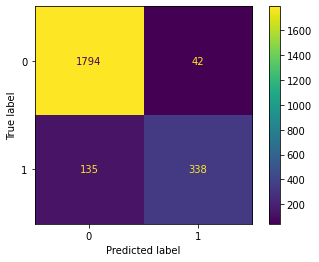

In [ ]:
plot_confusion_matrix(optmodel, X_test, y_test)  
plt.savefig('destination_path.pdf', format='pdf',bbox_inches = 'tight',
    pad_inches = 0)
plt.show()